# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Função `test_30_knn`

Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

Ao final, retorna 3 listas, contendo a **acurácia**, a **sensibilidade** e a **matriz de confusão** ao longo das 30 rodadas.

In [3]:
def test_30_knn(x, y, y_labels, k_vizinhos):
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize='true'))

        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
def load_correntes():
    return np.append(
    arr=np.load("corrente1.npy"),
    values=np.append(np.load("corrente2.npy"), np.load("corrente3.npy"), 0),
    axis=0)

# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chain_with_target = pd.DataFrame(data=data, columns=labels).fillna(value=0)

chainDF = chain_with_target.copy()

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com os dados carregados

In [5]:
chainDF.shape

(7851, 38)

In [6]:
chainDF.sample(3)

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessD5,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga
1328,0.011104,0.012236,0.013862,0.040533,0.206839,2.367877,0.008853,0.009764,0.011102,0.035353,...,0.028626,0.014559,0.000349,0.000212,0.000136,0.000581,0.007572,0.992337,45.0,0.0
7277,0.012300,0.014543,0.021302,0.086933,0.412663,4.520486,0.009795,0.011581,0.017346,0.075726,...,-0.023577,-0.011342,0.000117,0.000082,0.000088,0.000733,0.008259,0.991022,45.0,100.0
2086,0.011220,0.012411,0.014052,0.042487,0.214004,2.422459,0.008940,0.009914,0.011234,0.036418,...,0.038345,0.014356,0.000340,0.000208,0.000133,0.000610,0.007735,0.991071,45.0,0.0


In [7]:
chainDF.describe()

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessD5,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,...,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,0.011659,0.013451,0.017627,0.063597,0.310475,3.312243,0.009272,0.010695,0.014307,0.054659,...,0.012761,0.002218,0.000224,0.000147,0.000119,0.000808,0.009898,0.984748,45.091708,49.694306
std,0.001102,0.001709,0.004701,0.030260,0.148925,0.809602,0.000859,0.001334,0.004020,0.025998,...,0.053906,0.011577,0.000092,0.000059,0.000044,0.000560,0.007119,0.068205,9.991614,40.795070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.336391,-0.068359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,0.011175,0.012369,0.014061,0.040414,0.192664,2.556062,0.008899,0.009862,0.011258,0.034660,...,-0.010139,-0.003327,0.000131,0.000098,0.000085,0.000333,0.003474,0.982502,35.000000,0.000000
50%,0.011460,0.013052,0.016503,0.057861,0.282100,3.069992,0.009123,0.010388,0.013320,0.049756,...,0.012831,0.004095,0.000220,0.000142,0.000111,0.000634,0.007886,0.991570,45.000000,50.000000
75%,0.012027,0.014401,0.019949,0.080548,0.396623,4.180307,0.009574,0.011450,0.016239,0.069357,...,0.035000,0.008388,0.000303,0.000187,0.000149,0.001255,0.016329,0.996287,55.000000,100.000000
max,0.018549,0.020684,0.036409,0.172226,0.832394,5.370829,0.011858,0.015411,0.031664,0.150451,...,0.339453,0.054295,0.000553,0.000413,0.000277,0.002222,0.025331,0.999192,60.000000,100.000000


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

In [8]:
targetS.sample(3)

3347    1.0
816     2.0
5524    0.0
Name: classe, dtype: float64

## Observando distribuição de classes

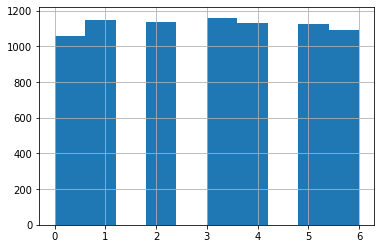

In [9]:
targetS.hist()

In [10]:
chain_with_target.groupby('classe').count()['carga']

classe
0.0    1059
1.0    1146
2.0    1137
3.0    1161
4.0    1131
5.0    1125
6.0    1092
Name: carga, dtype: int64

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 3480 -

- Acurácia 0.7134974533106961 -
- Sensibilidade [0.74375    0.55076923 0.63186813 0.81081081 0.52050473 0.76619718
 0.95614035] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.71       320
        HI-1       0.49      0.55      0.52       325
        HI-2       0.71      0.63      0.67       364
        HI-3       0.76      0.81      0.79       333
        LI-1       0.55      0.52      0.54       317
        LI-2       0.84      0.77      0.80       355
        LI-3       0.97      0.96      0.96       342

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


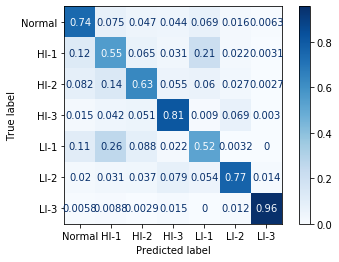


- RODADA 1 - Semente 7146 -

- Acurácia 0.7088285229202037 -
- Sensibilidade [0.67961165 0.58126722 0.64285714 0.82300885 0.53726708 0.78723404
 0.90988372] -

              precision    recall  f1-score   support

      Normal       0.69      0.68      0.68       309
        HI-1       0.50      0.58      0.54       363
        HI-2       0.69      0.64      0.66       350
        HI-3       0.80      0.82      0.81       339
        LI-1       0.55      0.54      0.54       322
        LI-2       0.82      0.79      0.81       329
        LI-3       0.98      0.91      0.94       344

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


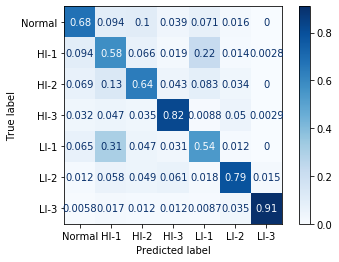


- RODADA 2 - Semente 1129 -

- Acurácia 0.7130730050933786 -
- Sensibilidade [0.71794872 0.52519894 0.68277946 0.79646018 0.58024691 0.77077364
 0.94135802] -

              precision    recall  f1-score   support

      Normal       0.66      0.72      0.69       312
        HI-1       0.56      0.53      0.54       377
        HI-2       0.72      0.68      0.70       331
        HI-3       0.78      0.80      0.79       339
        LI-1       0.52      0.58      0.55       324
        LI-2       0.83      0.77      0.80       349
        LI-3       0.97      0.94      0.96       324

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


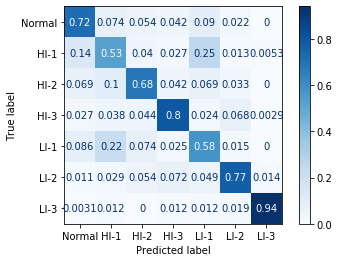


- RODADA 3 - Semente 5185 -

- Acurácia 0.7270797962648556 -
- Sensibilidade [0.72039474 0.6167147  0.63554217 0.73389356 0.596875   0.82471264
 0.9454023 ] -

              precision    recall  f1-score   support

      Normal       0.64      0.72      0.68       304
        HI-1       0.56      0.62      0.59       347
        HI-2       0.69      0.64      0.66       332
        HI-3       0.85      0.73      0.79       357
        LI-1       0.57      0.60      0.58       320
        LI-2       0.83      0.82      0.83       348
        LI-3       0.97      0.95      0.96       348

    accuracy                           0.73      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


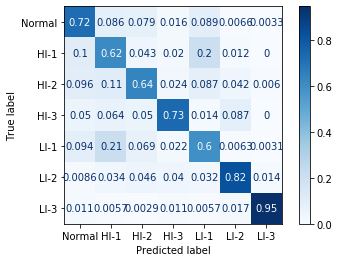


- RODADA 4 - Semente 7776 -

- Acurácia 0.7143463497453311 -
- Sensibilidade [0.66666667 0.5922865  0.67048711 0.79518072 0.55988024 0.76993865
 0.94797688] -

              precision    recall  f1-score   support

      Normal       0.69      0.67      0.68       306
        HI-1       0.53      0.59      0.56       363
        HI-2       0.73      0.67      0.70       349
        HI-3       0.76      0.80      0.78       332
        LI-1       0.56      0.56      0.56       334
        LI-2       0.81      0.77      0.79       326
        LI-3       0.97      0.95      0.96       346

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


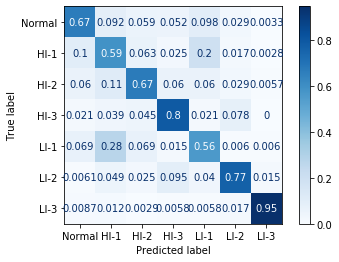


- RODADA 5 - Semente 3502 -

- Acurácia 0.715195246179966 -
- Sensibilidade [0.74074074 0.59467456 0.65994236 0.81049563 0.51289398 0.75842697
 0.94478528] -

              precision    recall  f1-score   support

      Normal       0.68      0.74      0.71       297
        HI-1       0.50      0.59      0.54       338
        HI-2       0.66      0.66      0.66       347
        HI-3       0.83      0.81      0.82       343
        LI-1       0.58      0.51      0.54       349
        LI-2       0.85      0.76      0.80       356
        LI-3       0.96      0.94      0.95       326

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


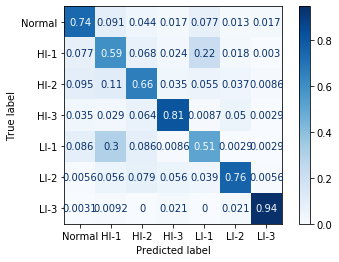


- RODADA 6 - Semente 4400 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.75       0.59392265 0.6300578  0.78963415 0.54907975 0.76256983
 0.93037975] -

              precision    recall  f1-score   support

      Normal       0.69      0.75      0.72       320
        HI-1       0.52      0.59      0.55       362
        HI-2       0.69      0.63      0.66       346
        HI-3       0.78      0.79      0.79       328
        LI-1       0.57      0.55      0.56       326
        LI-2       0.83      0.76      0.79       358
        LI-3       0.97      0.93      0.95       316

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


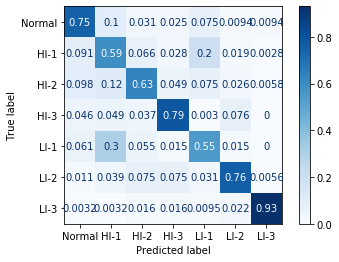


- RODADA 7 - Semente 93 -

- Acurácia 0.7024617996604414 -
- Sensibilidade [0.72695035 0.56111111 0.67251462 0.771261   0.5227882  0.75820896
 0.94736842] -

              precision    recall  f1-score   support

      Normal       0.63      0.73      0.67       282
        HI-1       0.50      0.56      0.53       360
        HI-2       0.69      0.67      0.68       342
        HI-3       0.80      0.77      0.78       341
        LI-1       0.60      0.52      0.56       373
        LI-2       0.79      0.76      0.77       335
        LI-3       0.97      0.95      0.96       323

    accuracy                           0.70      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.70      0.70      2356

Matriz de confusão normalizada


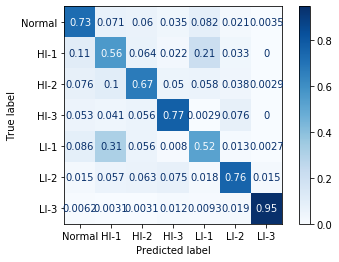


- RODADA 8 - Semente 6548 -

- Acurácia 0.7109507640067911 -
- Sensibilidade [0.69230769 0.54360465 0.70336391 0.80726257 0.53939394 0.74223602
 0.94362018] -

              precision    recall  f1-score   support

      Normal       0.68      0.69      0.69       338
        HI-1       0.50      0.54      0.52       344
        HI-2       0.65      0.70      0.68       327
        HI-3       0.82      0.81      0.81       358
        LI-1       0.55      0.54      0.55       330
        LI-2       0.82      0.74      0.78       322
        LI-3       0.98      0.94      0.96       337

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


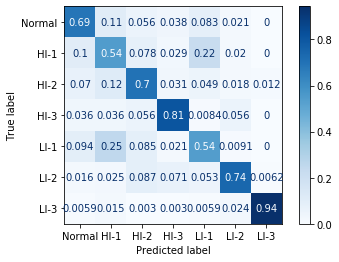


- RODADA 9 - Semente 3703 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.74174174 0.62874251 0.65846154 0.76638177 0.48626374 0.80307692
 0.92901235] -

              precision    recall  f1-score   support

      Normal       0.69      0.74      0.71       333
        HI-1       0.50      0.63      0.56       334
        HI-2       0.68      0.66      0.67       325
        HI-3       0.82      0.77      0.79       351
        LI-1       0.58      0.49      0.53       364
        LI-2       0.79      0.80      0.80       325
        LI-3       0.99      0.93      0.96       324

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


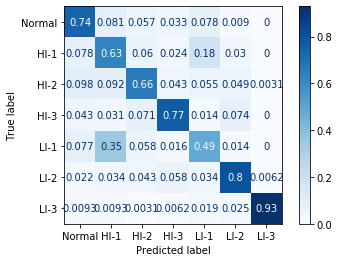


- RODADA 10 - Semente 3583 -

- Acurácia 0.7096774193548387 -
- Sensibilidade [0.69207317 0.53977273 0.68224299 0.74927114 0.57894737 0.78978979
 0.94362018] -

              precision    recall  f1-score   support

      Normal       0.68      0.69      0.69       328
        HI-1       0.52      0.54      0.53       352
        HI-2       0.65      0.68      0.66       321
        HI-3       0.80      0.75      0.77       343
        LI-1       0.58      0.58      0.58       342
        LI-2       0.80      0.79      0.80       333
        LI-3       0.97      0.94      0.95       337

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


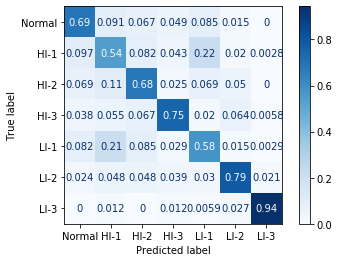


- RODADA 11 - Semente 3830 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.75301205 0.58456973 0.71171171 0.76229508 0.53982301 0.73667712
 0.95454545] -

              precision    recall  f1-score   support

      Normal       0.71      0.75      0.73       332
        HI-1       0.52      0.58      0.55       337
        HI-2       0.68      0.71      0.70       333
        HI-3       0.79      0.76      0.78       366
        LI-1       0.60      0.54      0.57       339
        LI-2       0.79      0.74      0.76       319
        LI-3       0.97      0.95      0.96       330

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


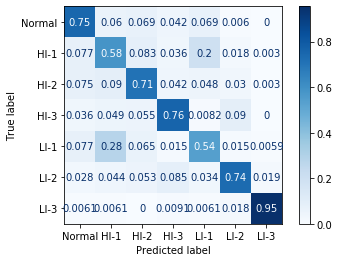


- RODADA 12 - Semente 6202 -

- Acurácia 0.7330220713073005 -
- Sensibilidade [0.76875    0.60445682 0.69688385 0.82058824 0.54464286 0.77044025
 0.94242424] -

              precision    recall  f1-score   support

      Normal       0.71      0.77      0.74       320
        HI-1       0.56      0.60      0.58       359
        HI-2       0.72      0.70      0.71       353
        HI-3       0.82      0.82      0.82       340
        LI-1       0.55      0.54      0.55       336
        LI-2       0.84      0.77      0.80       318
        LI-3       0.97      0.94      0.96       330

    accuracy                           0.73      2356
   macro avg       0.74      0.74      0.74      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


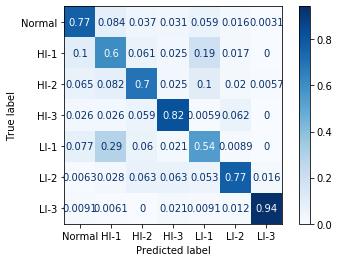


- RODADA 13 - Semente 6414 -

- Acurácia 0.7304753820033956 -
- Sensibilidade [0.72580645 0.60450161 0.67065868 0.78284182 0.56321839 0.80421687
 0.9454023 ] -

              precision    recall  f1-score   support

      Normal       0.69      0.73      0.71       310
        HI-1       0.52      0.60      0.56       311
        HI-2       0.68      0.67      0.67       334
        HI-3       0.84      0.78      0.81       373
        LI-1       0.60      0.56      0.58       348
        LI-2       0.82      0.80      0.81       332
        LI-3       0.98      0.95      0.96       348

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


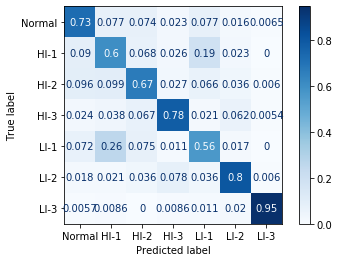


- RODADA 14 - Semente 505 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.715625   0.62280702 0.66288952 0.75409836 0.57223796 0.80124224
 0.94      ] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       320
        HI-1       0.52      0.62      0.57       342
        HI-2       0.71      0.66      0.69       353
        HI-3       0.79      0.75      0.77       366
        LI-1       0.60      0.57      0.59       353
        LI-2       0.81      0.80      0.81       322
        LI-3       0.98      0.94      0.96       300

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


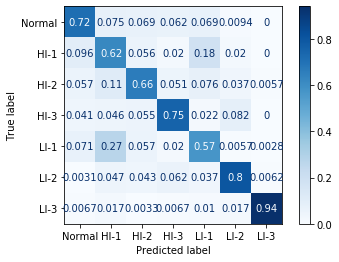


- RODADA 15 - Semente 3962 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.76047904 0.51412429 0.67378049 0.79824561 0.57878788 0.72364672
 0.95899054] -

              precision    recall  f1-score   support

      Normal       0.73      0.76      0.75       334
        HI-1       0.50      0.51      0.51       354
        HI-2       0.68      0.67      0.68       328
        HI-3       0.77      0.80      0.78       342
        LI-1       0.54      0.58      0.56       330
        LI-2       0.86      0.72      0.79       351
        LI-3       0.95      0.96      0.95       317

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


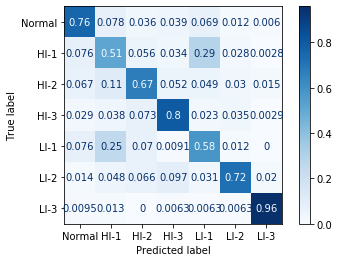


- RODADA 16 - Semente 4700 -

- Acurácia 0.7164685908319185 -
- Sensibilidade [0.7208589  0.57636888 0.69318182 0.77410468 0.54705882 0.78742515
 0.94897959] -

              precision    recall  f1-score   support

      Normal       0.66      0.72      0.69       326
        HI-1       0.53      0.58      0.55       347
        HI-2       0.72      0.69      0.70       352
        HI-3       0.81      0.77      0.79       363
        LI-1       0.56      0.55      0.55       340
        LI-2       0.83      0.79      0.81       334
        LI-3       0.97      0.95      0.96       294

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


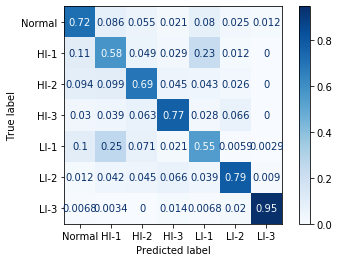


- RODADA 17 - Semente 325 -

- Acurácia 0.7173174872665535 -
- Sensibilidade [0.69636964 0.57863501 0.70170455 0.76358696 0.5625     0.75535168
 0.96096096] -

              precision    recall  f1-score   support

      Normal       0.67      0.70      0.68       303
        HI-1       0.50      0.58      0.54       337
        HI-2       0.72      0.70      0.71       352
        HI-3       0.83      0.76      0.79       368
        LI-1       0.57      0.56      0.56       336
        LI-2       0.81      0.76      0.78       327
        LI-3       0.97      0.96      0.97       333

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


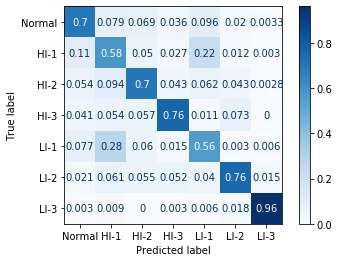


- RODADA 18 - Semente 2803 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.79617834 0.59943978 0.66060606 0.78947368 0.51585014 0.75358166
 0.94637224] -

              precision    recall  f1-score   support

      Normal       0.68      0.80      0.73       314
        HI-1       0.53      0.60      0.56       357
        HI-2       0.69      0.66      0.67       330
        HI-3       0.80      0.79      0.80       342
        LI-1       0.57      0.52      0.54       347
        LI-2       0.86      0.75      0.80       349
        LI-3       0.97      0.95      0.96       317

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


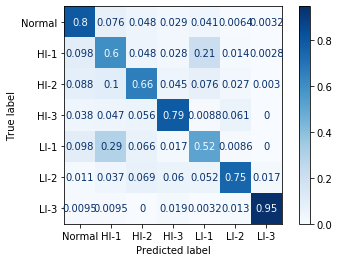


- RODADA 19 - Semente 4841 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.72068966 0.58208955 0.64945652 0.78873239 0.59593023 0.76347305
 0.94848485] -

              precision    recall  f1-score   support

      Normal       0.65      0.72      0.69       290
        HI-1       0.51      0.58      0.54       335
        HI-2       0.74      0.65      0.69       368
        HI-3       0.80      0.79      0.79       355
        LI-1       0.61      0.60      0.60       344
        LI-2       0.80      0.76      0.78       334
        LI-3       0.97      0.95      0.96       330

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


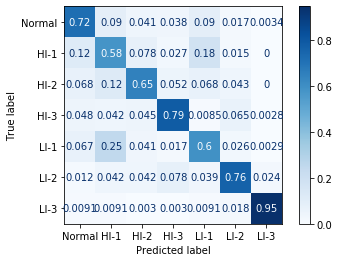


- RODADA 20 - Semente 4870 -

- Acurácia 0.735144312393888 -
- Sensibilidade [0.73548387 0.59076923 0.70621469 0.79444444 0.56456456 0.79941003
 0.94626866] -

              precision    recall  f1-score   support

      Normal       0.68      0.74      0.71       310
        HI-1       0.53      0.59      0.56       325
        HI-2       0.71      0.71      0.71       354
        HI-3       0.81      0.79      0.80       360
        LI-1       0.60      0.56      0.58       333
        LI-2       0.83      0.80      0.82       339
        LI-3       0.98      0.95      0.96       335

    accuracy                           0.74      2356
   macro avg       0.74      0.73      0.74      2356
weighted avg       0.74      0.74      0.74      2356

Matriz de confusão normalizada


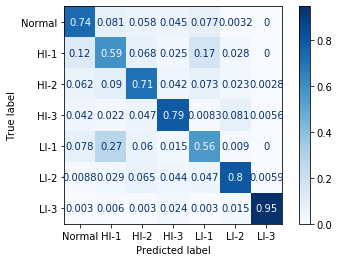


- RODADA 21 - Semente 3411 -

- Acurácia 0.7054329371816639 -
- Sensibilidade [0.69349845 0.5578635  0.69859155 0.76648352 0.51661631 0.77678571
 0.93870968] -

              precision    recall  f1-score   support

      Normal       0.68      0.69      0.69       323
        HI-1       0.46      0.56      0.51       337
        HI-2       0.70      0.70      0.70       355
        HI-3       0.83      0.77      0.80       364
        LI-1       0.53      0.52      0.52       331
        LI-2       0.84      0.78      0.81       336
        LI-3       0.97      0.94      0.95       310

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


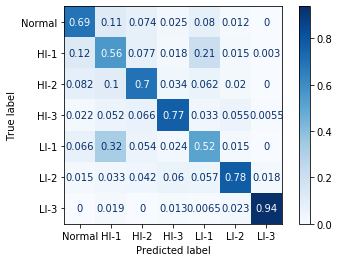


- RODADA 22 - Semente 482 -

- Acurácia 0.7164685908319185 -
- Sensibilidade [0.73355263 0.55619597 0.67584098 0.83591331 0.53757225 0.74193548
 0.92934783] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.71       304
        HI-1       0.49      0.56      0.52       347
        HI-2       0.70      0.68      0.69       327
        HI-3       0.78      0.84      0.81       323
        LI-1       0.57      0.54      0.56       346
        LI-2       0.83      0.74      0.78       341
        LI-3       0.98      0.93      0.95       368

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


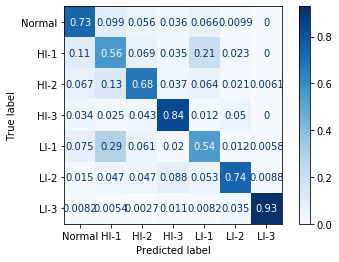


- RODADA 23 - Semente 6523 -

- Acurácia 0.7075551782682513 -
- Sensibilidade [0.69400631 0.53211009 0.66869301 0.76023392 0.55752212 0.77971014
 0.93837535] -

              precision    recall  f1-score   support

      Normal       0.69      0.69      0.69       317
        HI-1       0.48      0.53      0.50       327
        HI-2       0.69      0.67      0.68       329
        HI-3       0.78      0.76      0.77       342
        LI-1       0.54      0.56      0.55       339
        LI-2       0.82      0.78      0.80       345
        LI-3       0.97      0.94      0.95       357

    accuracy                           0.71      2356
   macro avg       0.71      0.70      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


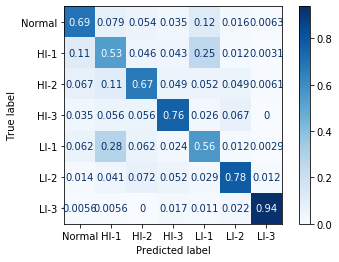


- RODADA 24 - Semente 3822 -

- Acurácia 0.7202886247877759 -
- Sensibilidade [0.74592834 0.55072464 0.72011662 0.79117647 0.53757225 0.77556818
 0.9380805 ] -

              precision    recall  f1-score   support

      Normal       0.68      0.75      0.71       307
        HI-1       0.51      0.55      0.53       345
        HI-2       0.70      0.72      0.71       343
        HI-3       0.80      0.79      0.79       340
        LI-1       0.60      0.54      0.57       346
        LI-2       0.83      0.78      0.80       352
        LI-3       0.98      0.94      0.96       323

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


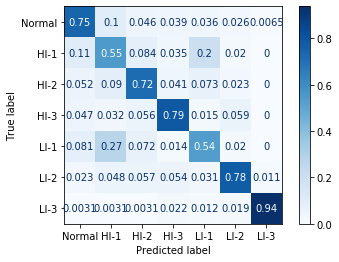


- RODADA 25 - Semente 4460 -

- Acurácia 0.6982173174872666 -
- Sensibilidade [0.71985816 0.51546392 0.69040248 0.76566757 0.53153153 0.76060606
 0.93093093] -

              precision    recall  f1-score   support

      Normal       0.65      0.72      0.69       282
        HI-1       0.53      0.52      0.52       388
        HI-2       0.64      0.69      0.67       323
        HI-3       0.80      0.77      0.78       367
        LI-1       0.53      0.53      0.53       333
        LI-2       0.80      0.76      0.78       330
        LI-3       0.95      0.93      0.94       333

    accuracy                           0.70      2356
   macro avg       0.70      0.70      0.70      2356
weighted avg       0.70      0.70      0.70      2356

Matriz de confusão normalizada


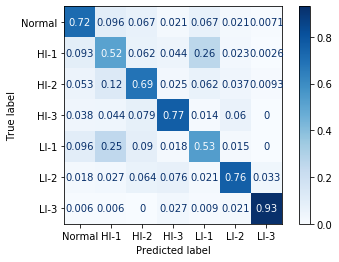


- RODADA 26 - Semente 7760 -

- Acurácia 0.7139219015280136 -
- Sensibilidade [0.72136223 0.56460674 0.68059701 0.75308642 0.56213018 0.77521614
 0.95195195] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       323
        HI-1       0.53      0.56      0.55       356
        HI-2       0.68      0.68      0.68       335
        HI-3       0.79      0.75      0.77       324
        LI-1       0.56      0.56      0.56       338
        LI-2       0.79      0.78      0.78       347
        LI-3       0.98      0.95      0.96       333

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


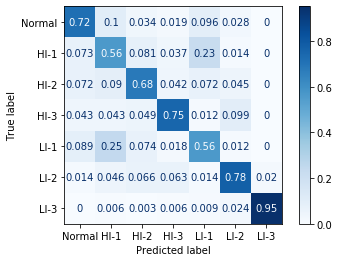


- RODADA 27 - Semente 6616 -

- Acurácia 0.7071307300509337 -
- Sensibilidade [0.715625   0.51445087 0.66468843 0.78223496 0.56402439 0.76044568
 0.95899054] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       320
        HI-1       0.50      0.51      0.51       346
        HI-2       0.65      0.66      0.66       337
        HI-3       0.81      0.78      0.80       349
        LI-1       0.53      0.56      0.55       328
        LI-2       0.83      0.76      0.80       359
        LI-3       0.97      0.96      0.96       317

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


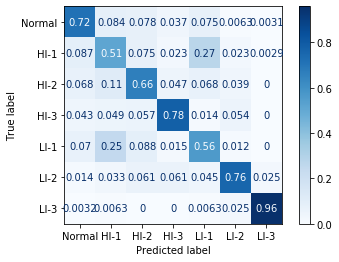


- RODADA 28 - Semente 7814 -

- Acurácia 0.7232597623089984 -
- Sensibilidade [0.74050633 0.54678363 0.70253165 0.79310345 0.57099698 0.77472527
 0.92625369] -

              precision    recall  f1-score   support

      Normal       0.69      0.74      0.71       316
        HI-1       0.54      0.55      0.54       342
        HI-2       0.69      0.70      0.70       316
        HI-3       0.80      0.79      0.80       348
        LI-1       0.56      0.57      0.57       331
        LI-2       0.81      0.77      0.79       364
        LI-3       0.98      0.93      0.95       339

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


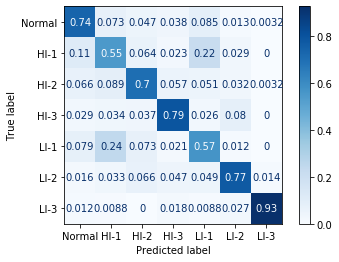


- RODADA 29 - Semente 1456 -

- Acurácia 0.7041595925297114 -
- Sensibilidade [0.68810289 0.5748503  0.62       0.77419355 0.51940299 0.79591837
 0.9502924 ] -

              precision    recall  f1-score   support

      Normal       0.67      0.69      0.68       311
        HI-1       0.48      0.57      0.52       334
        HI-2       0.69      0.62      0.65       350
        HI-3       0.78      0.77      0.78       341
        LI-1       0.58      0.52      0.55       335
        LI-2       0.79      0.80      0.79       343
        LI-3       0.99      0.95      0.97       342

    accuracy                           0.70      2356
   macro avg       0.71      0.70      0.70      2356
weighted avg       0.71      0.70      0.71      2356

Matriz de confusão normalizada


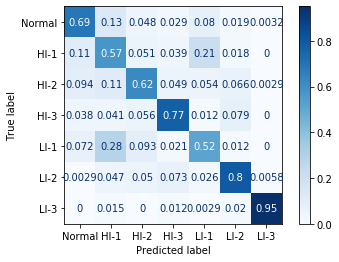

In [11]:
accuracy, recall, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [12]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.743750,0.550769,0.631868,0.810811,0.520505,0.766197,0.956140,0.713497
1,0.679612,0.581267,0.642857,0.823009,0.537267,0.787234,0.909884,0.708829
2,0.717949,0.525199,0.682779,0.796460,0.580247,0.770774,0.941358,0.713073
3,0.720395,0.616715,0.635542,0.733894,0.596875,0.824713,0.945402,0.727080
4,0.666667,0.592287,0.670487,0.795181,0.559880,0.769939,0.947977,0.714346
5,0.740741,0.594675,0.659942,0.810496,0.512894,0.758427,0.944785,0.715195
6,0.750000,0.593923,0.630058,0.789634,0.549080,0.762570,0.930380,0.712224
7,0.726950,0.561111,0.672515,0.771261,0.522788,0.758209,0.947368,0.702462
8,0.692308,0.543605,0.703364,0.807263,0.539394,0.742236,0.943620,0.710951
9,0.741742,0.628743,0.658462,0.766382,0.486264,0.803077,0.929012,0.712649


In [13]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.723929,0.569963,0.673956,0.783472,0.548871,0.772318,0.943164,0.715308
std,0.028425,0.032356,0.025960,0.023963,0.026366,0.022507,0.011079,0.008656
min,0.666667,0.514124,0.620000,0.733894,0.486264,0.723647,0.909884,0.698217
25%,0.701183,0.547769,0.660108,0.765846,0.532965,0.758932,0.938459,0.709996
50%,0.721111,0.575610,0.673148,0.785787,0.548069,0.770607,0.945094,0.714134
75%,0.741491,0.593514,0.695958,0.796140,0.564430,0.787377,0.948856,0.719652
max,0.796178,0.628743,0.720117,0.835913,0.596875,0.824713,0.960961,0.735144


In [27]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)
confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.723929,0.087671,0.057240,0.034551,0.077582,0.015368,0.003658
True - HI-1,0.100805,0.569963,0.064078,0.028741,0.215531,0.019366,0.001517
True - HI-2,0.074360,0.106511,0.673956,0.042024,0.064842,0.034343,0.003964
True - HI-3,0.036011,0.041699,0.055097,0.783472,0.014777,0.067618,0.001327
True - LI-1,0.079660,0.271355,0.068695,0.018344,0.548871,0.011515,0.001562
True - LI-2,0.013973,0.040489,0.055550,0.066013,0.037703,0.772318,0.013954
True - LI-3,0.005624,0.008985,0.002115,0.012186,0.007568,0.020358,0.943164


## Binarizando matriz de confusão